<a href="https://colab.research.google.com/github/VarelAntoni/machine_learning_project/blob/main/weather_data/weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ochid7/predict-the-weather")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ochid7/predict-the-weather/versions/1


In [23]:
print(os.listdir(path))

['weather_data.csv']


In [24]:
df = pd.read_csv(os.path.join(path, 'weather_data.csv'))

In [25]:
df.head()

,ghi,dhi,precip,timestamp_utc,temp,app_temp,dni,snow_depth,wind_cdir,rh,...,clouds_mid,wind_dir,snow,clouds_low,solar_rad,wind_gust_spd,timestamp_local,description(output),code,icon
0,0,0,0.0,2025-01-15T12:00:00,25.9,18.7,0,0,NNW,51,...,0,350,0,0,0.00000,11.9,2025-01-15T07:00:00,Few clouds,801,c02n
1,385,87,0.0,2025-01-15T15:00:00,29.3,22.8,748,0,NNW,41,...,0,360,0,0,384.62994,11.9,2025-01-15T10:00:00,Clear Sky,800,c01d
2,542,101,0.0,2025-01-15T18:00:00,36.5,32.0,831,0,NNW,30,...,0,340,0,0,542.37920,9.6,2025-01-15T13:00:00,Few clouds,801,c02d
3,193,65,0.0,2025-01-15T21:00:00,38.3,35.6,581,0,NW,28,...,0,310,0,0,192.98000,6.9,2025-01-15T16:00:00,Clear Sky,800,c01d
4,0,0,0.0,2025-01-16T00:00:00,29.3,27.5,0,0,W,46,...,0,280,0,0,0.00000,2.0,2025-01-15T19:00:00,Few clouds,801,c02n


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ghi                  40 non-null     int64  
 1   dhi                  40 non-null     int64  
 2   precip               40 non-null     float64
 3   timestamp_utc        40 non-null     object 
 4   temp                 40 non-null     float64
 5   app_temp             40 non-null     float64
 6   dni                  40 non-null     int64  
 7   snow_depth           40 non-null     int64  
 8   wind_cdir            40 non-null     object 
 9   rh                   40 non-null     int64  
 10  pod                  40 non-null     object 
 11  pop                  40 non-null     int64  
 12  ozone                40 non-null     int64  
 13  clouds_hi            40 non-null     int64  
 14  clouds               40 non-null     int64  
 15  vis                  40 non-null     float

In [27]:
df.isna().sum()

,0
ghi,0
dhi,0
precip,0
timestamp_utc,0
temp,0
app_temp,0
dni,0
snow_depth,0
wind_cdir,0
rh,0


In [28]:
categorical_col = df.select_dtypes(include=['object']).columns

# Pengecekan karakter dari data kategorikal
for i in categorical_col:
    print("Berikut ini merupakan informasi: {} dengan {}".format(i, df[i].unique()))
    print()

Berikut ini merupakan informasi: timestamp_utc dengan ['2025-01-15T12:00:00' '2025-01-15T15:00:00' '2025-01-15T18:00:00'
 '2025-01-15T21:00:00' '2025-01-16T00:00:00' '2025-01-16T03:00:00'
 '2025-01-16T06:00:00' '2025-01-16T09:00:00' '2025-01-16T12:00:00'
 '2025-01-16T15:00:00' '2025-01-16T18:00:00' '2025-01-16T21:00:00'
 '2025-01-17T00:00:00' '2025-01-17T03:00:00' '2025-01-17T06:00:00'
 '2025-01-17T09:00:00' '2025-01-17T12:00:00' '2025-01-17T15:00:00'
 '2025-01-17T18:00:00' '2025-01-17T21:00:00' '2025-01-18T00:00:00'
 '2025-01-18T03:00:00' '2025-01-18T06:00:00' '2025-01-18T09:00:00'
 '2025-01-18T12:00:00' '2025-01-18T15:00:00' '2025-01-18T18:00:00'
 '2025-01-18T21:00:00' '2025-01-19T00:00:00' '2025-01-19T03:00:00'
 '2025-01-19T06:00:00' '2025-01-19T09:00:00' '2025-01-19T12:00:00'
 '2025-01-19T15:00:00' '2025-01-19T18:00:00' '2025-01-19T21:00:00'
 '2025-01-20T00:00:00' '2025-01-20T03:00:00' '2025-01-20T06:00:00'
 '2025-01-20T09:00:00']

Berikut ini merupakan informasi: wind_cdir dengan 

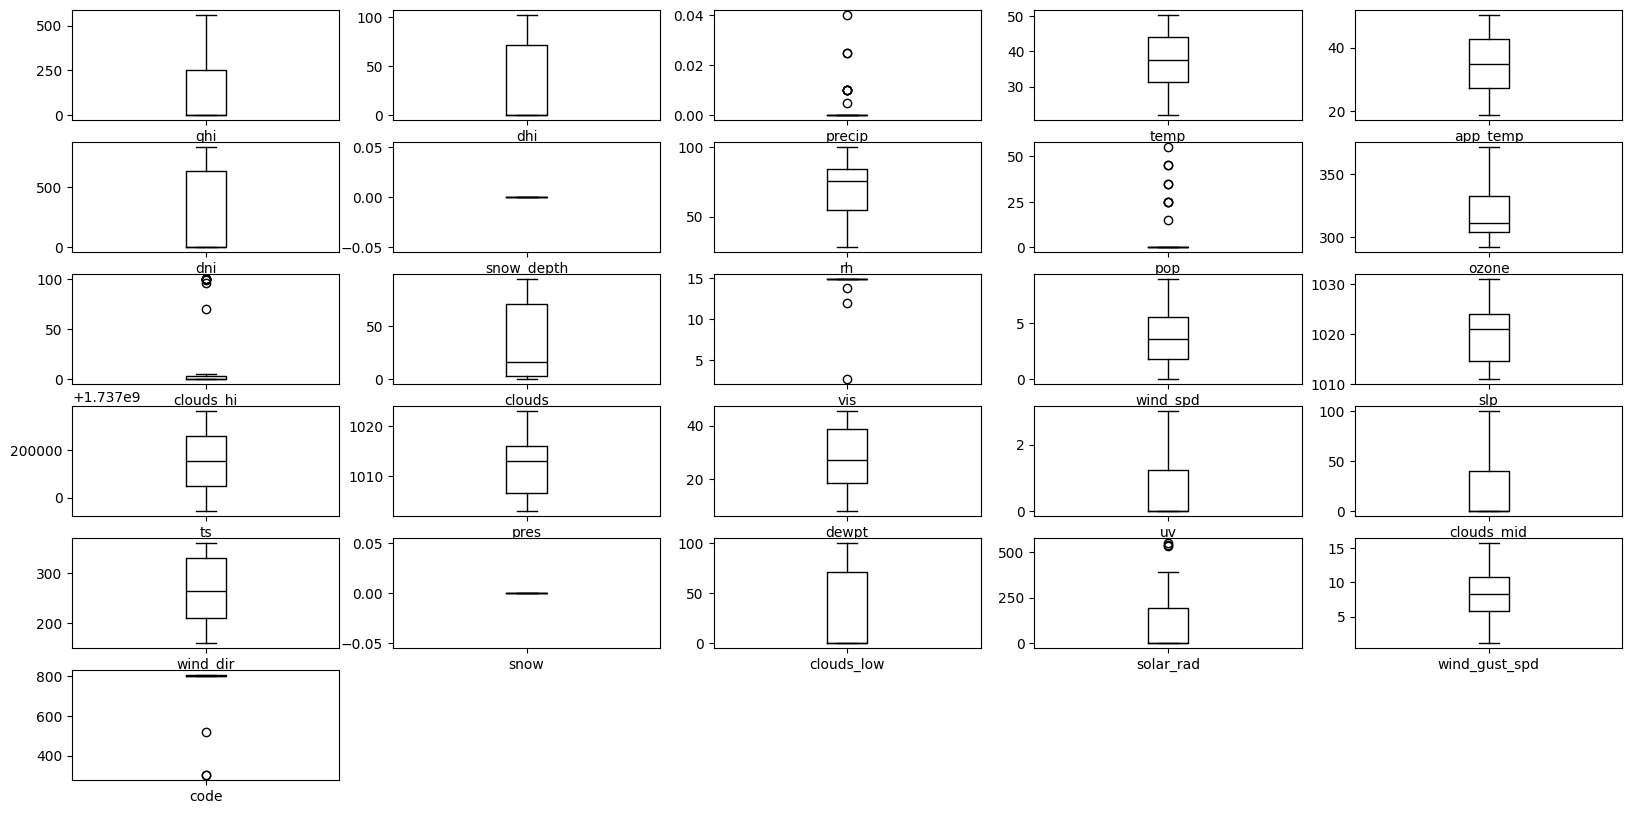

In [29]:
#Menampilkan boxplot untuk melihat outliers data numerik
df.plot(kind = 'box', subplots = True, layout = (6,5), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

In [30]:
df['description(output)'].value_counts()

,count
description(output),
Few clouds,18
Overcast clouds,8
Scattered clouds,4
Broken clouds,4
Clear Sky,3
Drizzle,2
Light shower rain,1


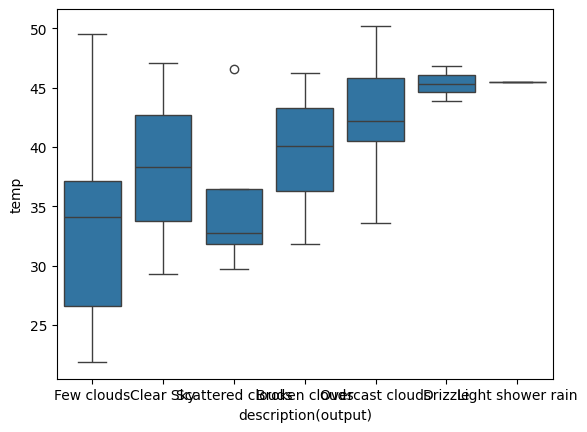

In [31]:
# Menampilkan data berdasarkan target untuk feature chol
sns.boxplot(x='description(output)', y='temp', data=df)
plt.show()

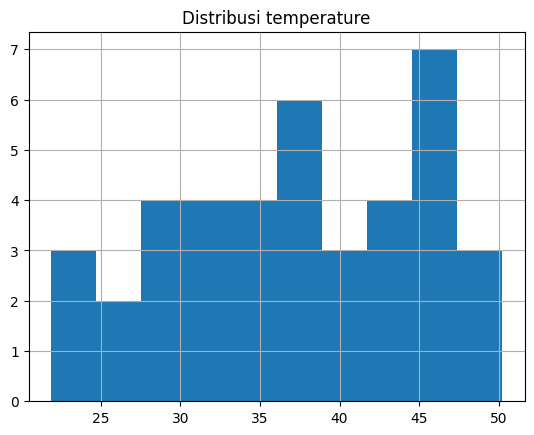

In [32]:
# Jumlah kategori temp pada dataset
df['temp'].hist().plot(kind='bar')
plt.title('Distribusi temperature')
plt.show()

In [33]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')

print(spearman_corr)

                    ghi       dhi    precip      temp  app_temp       dni  \
ghi            1.000000  0.998945  0.075382  0.594736  0.538197  1.000000   
dhi            0.998945  1.000000  0.065030  0.584941  0.527208  0.998945   
precip         0.075382  0.065030  1.000000  0.459025  0.468794  0.075382   
temp           0.594736  0.584941  0.459025  1.000000  0.977057  0.594736   
app_temp       0.538197  0.527208  0.468794  0.977057  1.000000  0.538197   
dni            1.000000  0.998945  0.075382  0.594736  0.538197  1.000000   
snow_depth          NaN       NaN       NaN       NaN       NaN       NaN   
rh            -0.334289 -0.349882  0.665933  0.180384  0.225504 -0.334289   
pop            0.061407  0.051054  0.998682  0.453670  0.462785  0.061407   
ozone         -0.252157 -0.250803 -0.550201 -0.311476 -0.292138 -0.252157   
clouds_hi      0.280306  0.263193  0.333200  0.266785  0.317656  0.280306   
clouds        -0.007255 -0.022004  0.641890  0.452896  0.472247 -0.007255   

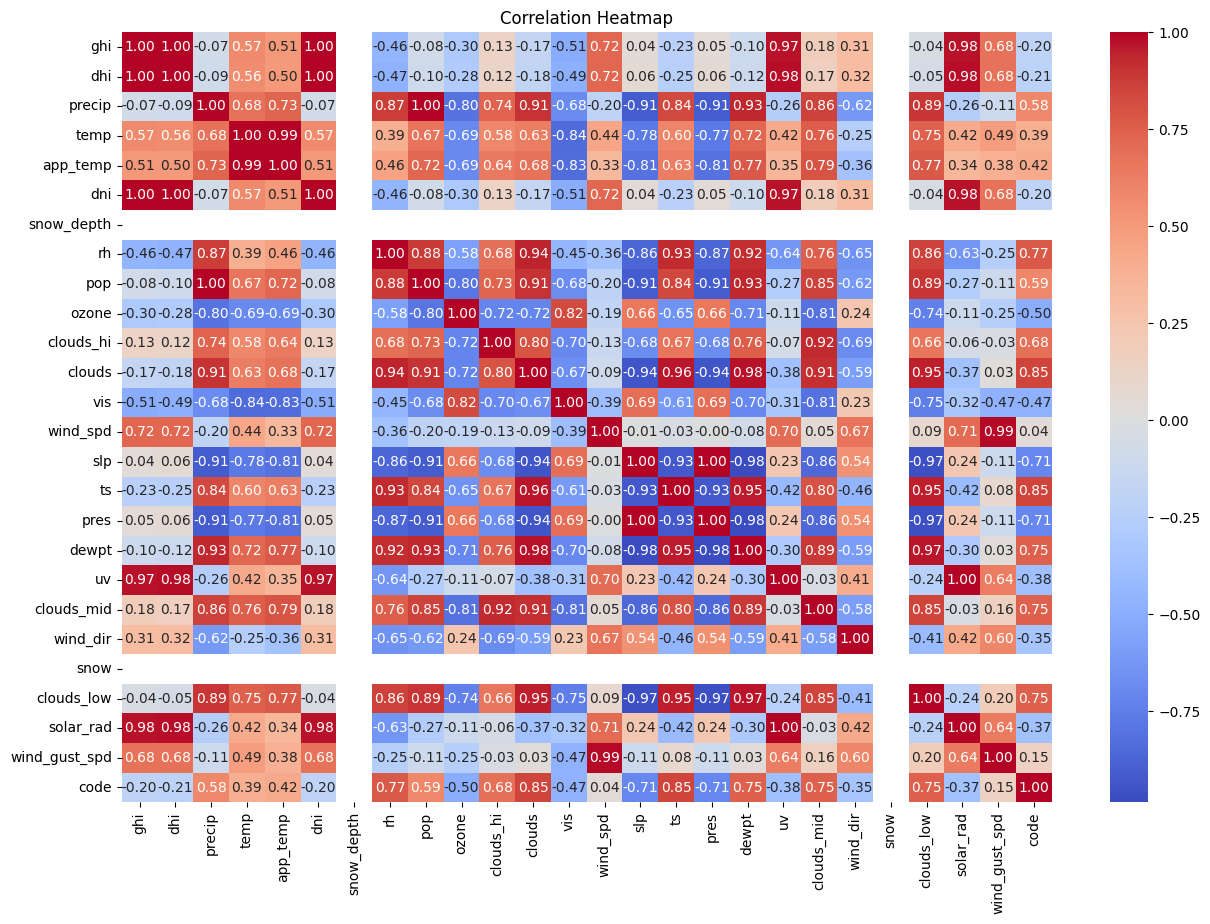

In [34]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(spearman_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

def encode_object_columns(df):
    df_encoded = df.copy()

    encoder = LabelEncoder()

    for col in df_encoded.select_dtypes(include=['object']).columns:
        df_encoded[col] = encoder.fit_transform(df_encoded[col])

    return df_encoded

df_encoded = encode_object_columns(df)

In [36]:
df_encoded.head()

,ghi,dhi,precip,timestamp_utc,temp,app_temp,dni,snow_depth,wind_cdir,rh,...,clouds_mid,wind_dir,snow,clouds_low,solar_rad,wind_gust_spd,timestamp_local,description(output),code,icon
0,0,0,0.0,0,25.9,18.7,0,0,0,51,...,0,350,0,0,0.00000,11.9,0,3,801,2
1,385,87,0.0,1,29.3,22.8,748,0,0,41,...,0,360,0,0,384.62994,11.9,1,1,800,0
2,542,101,0.0,2,36.5,32.0,831,0,0,30,...,0,340,0,0,542.37920,9.6,2,3,801,1
3,193,65,0.0,3,38.3,35.6,581,0,1,28,...,0,310,0,0,192.98000,6.9,3,1,800,0
4,0,0,0.0,4,29.3,27.5,0,0,6,46,...,0,280,0,0,0.00000,2.0,4,3,801,2


In [37]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ghi                  40 non-null     int64  
 1   dhi                  40 non-null     int64  
 2   precip               40 non-null     float64
 3   timestamp_utc        40 non-null     int64  
 4   temp                 40 non-null     float64
 5   app_temp             40 non-null     float64
 6   dni                  40 non-null     int64  
 7   snow_depth           40 non-null     int64  
 8   wind_cdir            40 non-null     int64  
 9   rh                   40 non-null     int64  
 10  pod                  40 non-null     int64  
 11  pop                  40 non-null     int64  
 12  ozone                40 non-null     int64  
 13  clouds_hi            40 non-null     int64  
 14  clouds               40 non-null     int64  
 15  vis                  40 non-null     float

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
df_encoded.shape

(40, 34)

In [46]:
X = df_encoded.drop(columns=['description(output)'], axis = 1)
y = df_encoded['description(output)']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.model_selection import StratifiedKFold

rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

param_rf = {
    'n_estimators': [50, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

skf = StratifiedKFold(n_splits=3)
grid_search_rf = GridSearchCV(rf_classifier, param_rf, cv=skf, scoring='f1_weighted')
grid_search_rf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [3, 5], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 200]},
             scoring='f1_weighted')

In [51]:
grid_search_rf.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [52]:
best_gs_rf = grid_search_rf.best_estimator_

In [53]:
print('Score on train data = ', round(best_gs_rf.score(X_train_scaled, y_train), 4))
print('Score on test data = ', round(best_gs_rf.score(X_test_scaled, y_test), 4))

Score on train data =  1.0
Score on test data =  0.9167
